# Billiald Experience

We are reproducing the billiald simulation in order to understand better our materials parameters.

The simulation was done using the Multi-Object Orientated Simuation Environment (MOOSE), and iterated over a range of values using a python script called billiald_simulation.py. The results where saved in a csv file that will here be extracted in order to be analyzed in compared to the simulation that can be found in Jordan's Billiald paper.


In [1]:
#Importing the libraries required (we will use the pandas library to play with the data

%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## The data

The data is saved in a csv file with the following columns: 
    [Alpha, Beta, DV1, ... DV9]
    
Where DV are the 9 voltages at which we simulated for each set of the material's property.


In [2]:
df4 = pd.read_csv("./data/T_4_alpha-0.05-4.95-step0.1_beta-81967213.1148.csv",header=None, names = ["alpha","beta","100nA","200nA","300nA",
                                                "400nA","500nA","600nA","700nA","800nA","900nA"])
df4.head(2)

,alpha,beta,100nA,200nA,300nA,400nA,500nA,600nA,700nA,800nA,900nA
0,0.05,8.196721e+07,0.205544,0.244621,0.280285,0.312678,0.342251,0.369461,0.394703,0.418291,0.440477
1,0.15,8.196721e+07,0.181518,0.201177,0.222160,0.242707,0.262293,0.280817,0.298327,0.314915,0.330679


In [3]:
df5 = pd.read_csv("./data/T_5_alpha-3.0-14.9-step0.1_beta-81967213.1148.csv",header=None, names = ["alpha","beta","100nA","200nA","300nA",
                                                "400nA","500nA","600nA","700nA","800nA","900nA"])
df5.head(2)

,alpha,beta,100nA,200nA,300nA,400nA,500nA,600nA,700nA,800nA,900nA
0,3.0,8.196721e+07,0.172215,0.177426,0.184167,0.191584,0.199216,0.206830,0.214312,0.221611,0.228708
1,3.1,8.196721e+07,0.172138,0.177196,0.183769,0.191026,0.198512,0.205995,0.213359,0.220552,0.227553


In [4]:
df6 = pd.read_csv("./data/T_6_alpha-28.0-34.9-step0.1_beta-81967213.1148.csv",header=None, names = ["alpha","beta","100nA","200nA","300nA",
                                                "400nA","500nA","600nA","700nA","800nA","900nA"])
df6.head(2)

,alpha,beta,100nA,200nA,300nA,400nA,500nA,600nA,700nA,800nA,900nA
0,28.0,8.196721e+07,0.171094,0.173851,0.177630,0.181972,0.186583,0.191294,0.196010,0.200681,0.205281
1,28.1,8.196721e+07,0.171090,0.173838,0.177606,0.181937,0.186538,0.191239,0.195946,0.200609,0.205202


### This code allows to look up at a certain value of the sink

Enter, the sink factor in alpha.

Alpha T^4 = 0.15
Alpha T^5 = 3.1
Alpha T^6 = 28.1


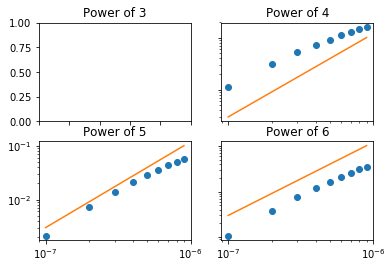

In [5]:
# Choose the index here:
index3 = 1
index4 = 1
index5 = 1
index6 = 1

## Power of 3 REQUIRES SIM TO WORK
#l3=df3.iloc[:,:].values
#Temp = l3[index3].flatten()[2:]
#
#I3 = np.arange(100,1000,100)*1E-9
#T3 = [x-0.170 for x in Temp]
#trend = [np.power(i,1.6)*(3E-3/np.power((100E-9),1.6)) for i in I3]

# Power of 4
l4=df4.iloc[:,:].values
Temp4 = l4[index4].flatten()[2:]

I4 = np.arange(100,1000,100)*1E-9
T4 = [x-0.170 for x in Temp4]
trend = [np.power(i,1.6)*(3E-3/np.power((100E-9),1.6)) for i in I4]


# Power of 5

l5=df5.iloc[:,:].values
Temp5 = l5[index5].flatten()[2:]

I5 = np.arange(100,1000,100)*1E-9
T5 = [x-0.170 for x in Temp5]
trend = [np.power(i,1.6)*(3E-3/np.power((100E-9),1.6)) for i in I5]

# Power of 6
l6=df6.iloc[:,:].values
Temp6 = l6[index6].flatten()[2:]

I6 = np.arange(100,1000,100)*1E-9
T6 = [x-0.170 for x in Temp6]
trend = [np.power(i,1.6)*(3E-3/np.power((100E-9),1.6)) for i in I6]


## PLOTING ##
plt.close('all')
f, axarr = plt.subplots(2, 2)
#axarr[0, 0].loglog(I, T,"o", basex=10)
#axarr[0, 0].loglog(I,trend)
axarr[0, 0].set_title('Power of 3')

axarr[0, 1].loglog(I4, T4,"o", basex=10)
axarr[0, 1].loglog(I4,trend)
axarr[0, 1].set_title('Power of 4')

axarr[1, 0].loglog(I5, T5,"o", basex=10)
axarr[1, 0].loglog(I5,trend)
axarr[1, 0].set_title('Power of 5')

axarr[1, 1].loglog(I6, T6,"o", basex=10)
axarr[1, 1].loglog(I6,trend)
axarr[1, 1].set_title('Power of 6')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)


# Print the values of the alphas 
#print "Alpha T^3 = " + str(l3[index3])
print "Alpha T^4 = " + str(l4[index4,0])
print "Alpha T^5 = " + str(l5[index5,0])
print "Alpha T^6 = " + str(l6[index6,0])